In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('winequality-red.csv')
df[df.columns.difference(['density', 'chlorides'])] = df[df.columns.difference(['density', 'chlorides'])].round(2)
df['density'] = df['density'].round(5)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [224]:
def convert_quality(quality):
    if quality == 3 or quality == 4:
        return 'Shit'
    elif quality == 5:
        return 'Ok'
    elif quality == 6:
        return 'Fine'
    else:
        return 'Good'

In [225]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#X = df[df.columns.difference(['quality'])]
X = df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol']]
df['quality'] = df['quality'].apply(convert_quality)
y = df['quality']
dummies = pd.get_dummies(y)
X_train, X_test, y_train, y_test = train_test_split(X.values, dummies, test_size=0.3)
dummies.head()

,Fine,Good,Ok,Shit
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [226]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

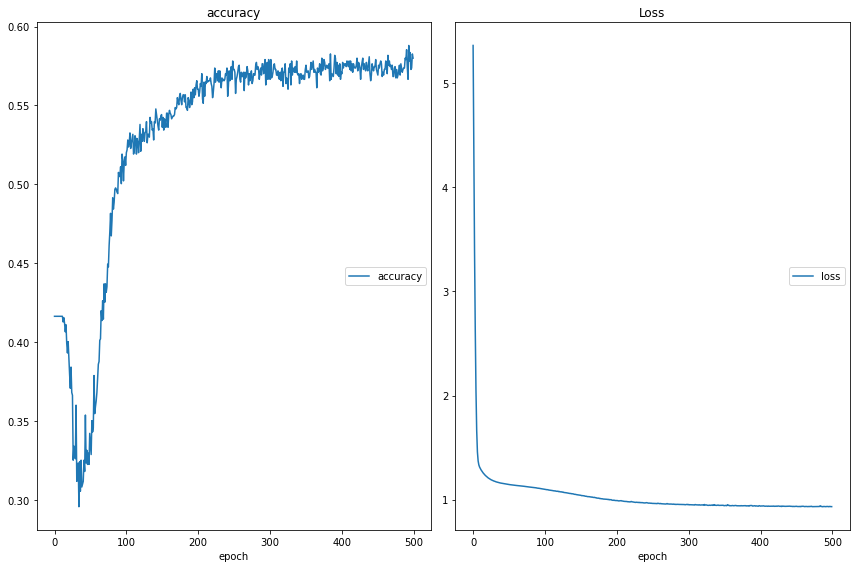

accuracy
	accuracy         	 (min:    0.296, max:    0.588, cur:    0.580)
Loss
	loss             	 (min:    0.932, max:    5.363, cur:    0.933)
35/35 [==============================] - 0s 8ms/step - loss: 0.9330 - accuracy: 0.5800


In [227]:
from livelossplot import PlotLossesKeras

model.fit(X_train, y_train, epochs=500, callbacks=[PlotLossesKeras()])
y_pred = model.predict(X_test)

<AxesSubplot:>

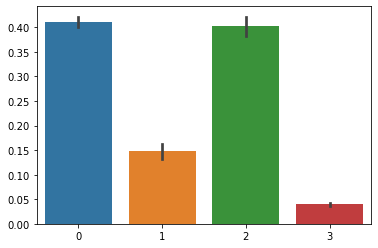

In [228]:
sns.barplot(data=y_pred)

In [229]:
results = model.evaluate(X_train, y_train)
results

35/35 [==============================] - 0s 458us/step - loss: 0.9315 - accuracy: 0.5782


[0.9315255284309387, 0.578194797039032]

In [230]:
results = model.evaluate(X_test, y_test)
results

15/15 [==============================] - 0s 801us/step - loss: 0.9224 - accuracy: 0.5813


[0.9223933815956116, 0.581250011920929]

In [231]:
model.save('NN_Model')
print(model.get_weights())

INFO:tensorflow:Assets written to: NN_Model\assets
[array([[ 0.6559044 , -1.4963783 ,  0.5517843 ],
       [ 0.3151463 , -0.11157236,  0.03689015],
       [ 0.01457173,  1.0548538 ,  0.4541967 ],
       [ 0.4986941 ,  1.054562  , -0.16238111]], dtype=float32), array([ 1.330618 , -1.5319098,  0.       ], dtype=float32), array([[ 0.10956073,  0.78383255, -0.89393616],
       [-0.7427614 , -0.6676305 ,  0.51506287],
       [ 0.95076275,  0.4592979 , -0.03682041]], dtype=float32), array([ 0.        ,  1.3703021 , -0.03834452], dtype=float32), array([[ 0.18194115, -0.06463408,  0.72714055, -0.7072453 ],
       [-0.78960574, -3.933345  ,  1.5168073 ,  1.778337  ],
       [-0.6448535 , -0.37596396, -0.79182553,  0.8402407 ]],
      dtype=float32), array([ 1.0719188,  1.0863183, -0.5628826, -3.120303 ], dtype=float32)]
